# Data Storytelling in Pattern Recognition
***

## Data Exploration

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, widgets

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Africa Food Production
***

In [2]:
# Load the Production Dataset
prod_data = pd.read_csv('Africa Food Production (2004 - 2013).csv')
prod_data.info()
print('=====================================================================')
prod_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [3]:
# Convert `Year` column to datetime
prod_data['Year'] = pd.to_datetime(prod_data['Year'], format='%Y').dt.year
# Add a new column displaying the value metric (kilotons)
prod_data['Value_display'] = prod_data['Value'].astype(str) + 'kt'

prod_data.head()

,Country,Item,Year,Value,Value_display
0,Algeria,Wheat and products,2004,2731,2731kt
1,Algeria,Wheat and products,2005,2415,2415kt
2,Algeria,Wheat and products,2006,2688,2688kt
3,Algeria,Wheat and products,2007,2319,2319kt
4,Algeria,Wheat and products,2008,1111,1111kt


In [4]:
# Group by 'Country', 'Year', and 'Item' and display the sum of 'Value' for each combination
grouped_data = pd.DataFrame(prod_data.groupby(['Country', 'Year', 'Item'])['Value'].sum())

grouped_data.info()
print('=====================================================================')
grouped_data.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23110 entries, ('Algeria', 2004, 'Apples and products') to ('Zimbabwe', 2013, 'Wine')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   23110 non-null  int64
dtypes: int64(1)
memory usage: 249.6+ KB


Value
Country Year Item                       
Algeria 2004 Apples and products     165
             Bananas                   0
             Barley and products    1212
             Beans                     2
             Beer                    110
             Beverages, Alcoholic      0
             Bovine Meat             125
             Butter, Ghee              2
             Cephalopods               1
             Cereals, Other            0

In [5]:
# Check the number of Countries, Items and Years
print(f'Number of Countries: {prod_data["Country"].nunique()}')
print(f'Number of Items: {prod_data["Item"].nunique()}')
print(f'Number of years: {prod_data["Year"].nunique()}')

Number of Countries: 45
Number of Items: 94
Number of years: 10


In [6]:
# Group by 'Country'and 'Year' and display the sum of 'Value' for each combination
totalled_data = pd.DataFrame(prod_data.groupby(['Country', 'Year'])['Value'].sum())

totalled_data.info()
print('=====================================================================')
totalled_data.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 450 entries, ('Algeria', 2004) to ('Zimbabwe', 2013)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   450 non-null    int64
dtypes: int64(1)
memory usage: 4.9+ KB


Value
Country Year       
Algeria 2004  15536
        2005  15667
        2006  16417
        2007  14763
        2008  13841
        2009  19820
        2010  20263
        2011  21778
        2012  24206
        2013  26359

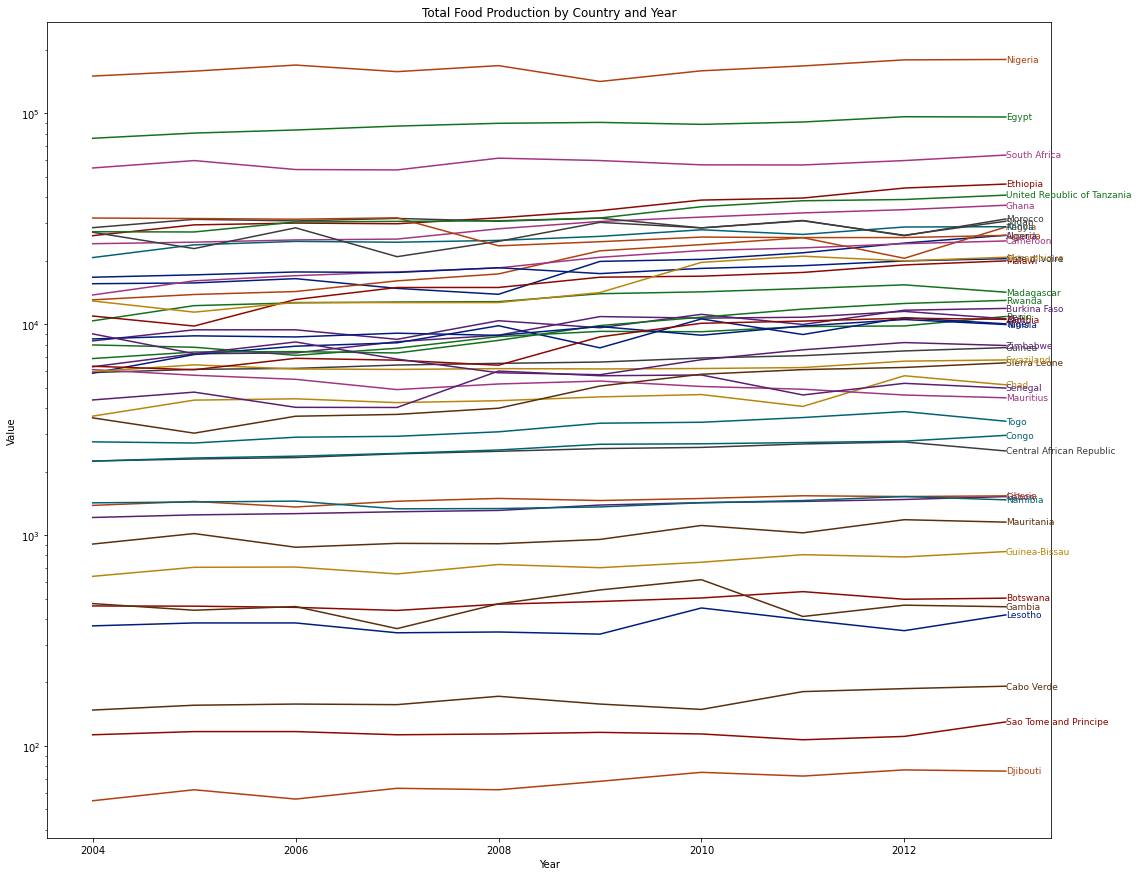

In [7]:
# Reset the index to make 'Country' and 'Year' regular columns
totalled_data.reset_index(inplace=True)
# Creat a line plot
plt.figure(figsize=(18, 15))
proddatasetlp = sns.lineplot(x='Year', y='Value', hue='Country', data=totalled_data, palette='dark')
# Set y-scale to logarithmic
plt.yscale('log')
# Add country names
for line, label in zip(proddatasetlp.lines, totalled_data['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')
# Remove the legend
proddatasetlp.legend_.remove()
# Add a title
plt.title('Total Food Production by Country and Year')

plt.show()

In [8]:
# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Function to update the map for a specific year
def update_map(year):
    plt.clf()  # Clear the previous plot
    # Filter data for the selected year
    filtered_data = totalled_data[totalled_data['Year'] == year]
    # Merge the world map with the filtered data
    merged_data = world.merge(filtered_data, how='left', left_on='name', right_on='Country')
    # Filter out rows with null values
    merged_data = merged_data[~merged_data['Value'].isnull()]
    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    merged_data.plot(column='Value', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    # Add country names as annotations
    for idx, row in merged_data.iterrows():
        plt.annotate(text=row['Country'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', fontsize=8, color='black')
    # Add a title
    plt.title(f'Total Food Production by Country - Year {year}')
    plt.show()

# Create a slider widget for years
year_slider = widgets.IntSlider(min=totalled_data['Year'].min(), max=totalled_data['Year'].max(),
                                step=1, value=totalled_data['Year'].min(),
                                description='Select Year')

# Use the interactive function to connect the slider with the update_map function
interactive_plot = interact(update_map, year=year_slider)

interactive(children=(IntSlider(value=2004, description='Select Year', max=2013, min=2004), Output()), _dom_cl…

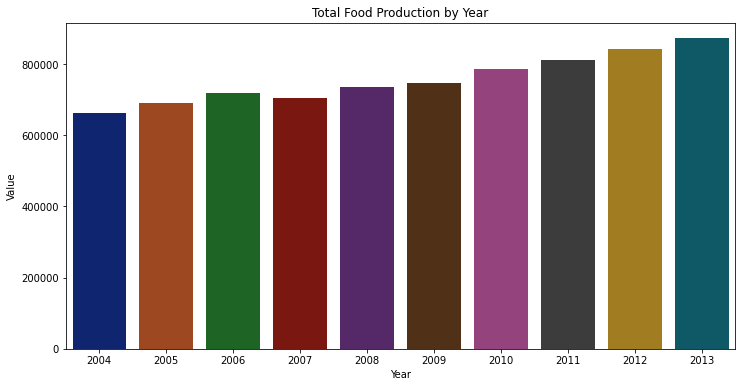

In [9]:
# Group by 'Year' and aggregate the values
grouped_by_year = totalled_data.groupby('Year')['Value'].sum().reset_index()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Value', data=grouped_by_year, palette='dark')
# Add a title
plt.title('Total Food Production by Year')

plt.show()

#### Observations:

**Top Food Producers:**
 Nigeria, Egypt, and South Africa consistently emerge as the top three countries leading in food production over the years. This sustained high performance can be attributed to several factors, including favorable climate conditions, advanced agricultural practices, government policies supportive of the agriculture sector, continuous technological advancements, and well-developed infrastructure.

**Bottom Food Producers:**
 Conversely, Djibouti, Sao Tome and Principe, and Cabo Verde consistently rank among the bottom three countries in terms of food production in Africa. The lower levels of food production in these countries may be associated with various challenges, including geographical constraints that limit agricultural activities, a less diversified agricultural sector, and obstacles in infrastructure development.

**Peak Production Year (2013):**
 The data highlights a notable peak in total food production in the year 2013, reaching an impressive high of 872,571 units. This peak could be indicative of favorable conditions, increased agricultural productivity, or strategic interventions in that specific year.

**Lowest Production Year (2004):**
 In contrast, the year 2004 stands out as a period of lower production, recording the lowest total food production among the specified years. The total output for this year amounted to 663,006 units. Identifying the factors contributing to this dip could provide insights into challenges or external influences affecting agricultural performance during that period.

**Factors Influencing Production Disparities:**
 The disparities in food production across these countries highlight the significance of external factors in shaping agricultural outcomes. Climate, government policies, technological adoption, and infrastructure development play pivotal roles in determining a country's ability to meet its food demands

### Africa Food Supply
***

In [10]:
supp_data = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

supp_data.info()
print('=====================================================================')
supp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [11]:
# Convert `Year` column to datetime
supp_data['Year'] = pd.to_datetime(supp_data['Year'], format='%Y').dt.year
# Add a new column displaying the value metric (kilotons)
supp_data['Value_display'] = supp_data['Value'].astype(str) + 'kcal/person/day'

supp_data.head()

,Country,Year,Value,Value_display
0,Algeria,2004,2987,2987kcal/person/day
1,Algeria,2005,2958,2958kcal/person/day
2,Algeria,2006,3047,3047kcal/person/day
3,Algeria,2007,3041,3041kcal/person/day
4,Algeria,2008,3048,3048kcal/person/day


In [12]:
grouped_by_country = pd.DataFrame(supp_data.groupby(['Country', 'Year'])['Value'].sum())
grouped_by_country

Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

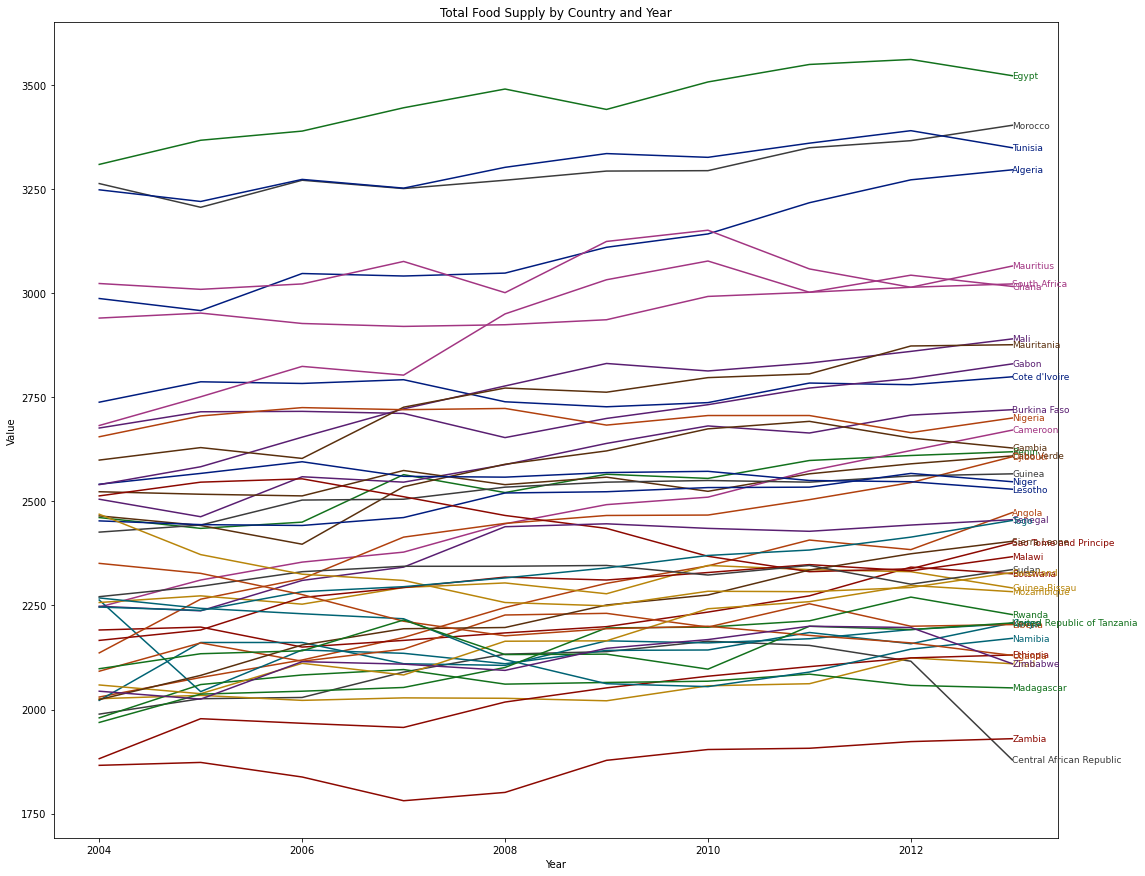

In [13]:
supp_data.reset_index(inplace=True)

# Create a line plot
plt.figure(figsize=(18, 15))
proddatasetlp = sns.lineplot(x='Year', y='Value', hue='Country', data=supp_data, palette='dark')

# Adding the country names on the lines
for line, label in zip(proddatasetlp.lines, supp_data['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')

# Remove the legend
proddatasetlp.legend_.remove()

# Adding a title
plt.title('Total Food Supply by Country and Year')

plt.show()

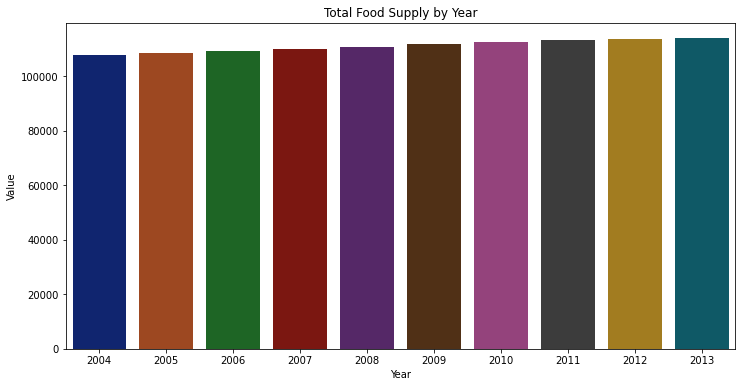

In [14]:
# Group by 'Year' and aggregate the values
grouped_by_year = supp_data.groupby('Year')['Value'].sum().reset_index()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Value', data=grouped_by_year, palette='dark')
# Add a title
plt.title('Total Food Supply by Year')

plt.show()

#### Observations:

**Top Food Suppliers:** 
 Egypt, Morocco, and Tunisia consistently emerge as the top three countries leading in food supply across the years. Their sustained leadership is attributed to a combination of favorable geographical conditions, advanced agricultural practices, strong government support, and continuous technological advancements.

**Bottom Food Suppliers:** 
 Central African Republic, Zambia, and Madagascar consistently rank among the bottom three countries in terms of food supply in Africa. The challenges faced by these countries may include geopolitical issues, economic constraints, climate variability, and limited access to modern agricultural practices.

**Importance of Water Resources:**
 Countries with strategic control or efficient utilization of water resources, such as Egypt along the Nile, showcase the vital role of water management in agricultural success. Sustainable water practices are increasingly becoming critical for ensuring food security in arid regions.

**Upward Trend in Food Supply:** 
 The data reveals a consistent and positive upward trend in food supply over the observed years. Starting at 107,740 units in 2004, the quantity of food has steadily increased, reaching a peak of 113,951 units in 2013

## Analysing the Problem Pattern

"Can you infer what three countries have produced the highest total quantity of rice from 2004 to 2013?"

In [15]:
# Filter data for rice production
rice_data = prod_data[prod_data['Item'] == 'Rice (Milled Equivalent)']
# Group by 'Country' and calculate the sum of 'Value'
rice_producers = rice_data.groupby('Country')['Value'].sum().reset_index()
# Sort the DataFrame by total quantity in descending order
rice_producers = rice_producers.sort_values(by='Value', ascending=False)
# Display the top three countries
print(rice_producers.head(3))

       Country  Value
9        Egypt  40370
26     Nigeria  26964
18  Madagascar  26118


## Some Statistical Measures and their Applications

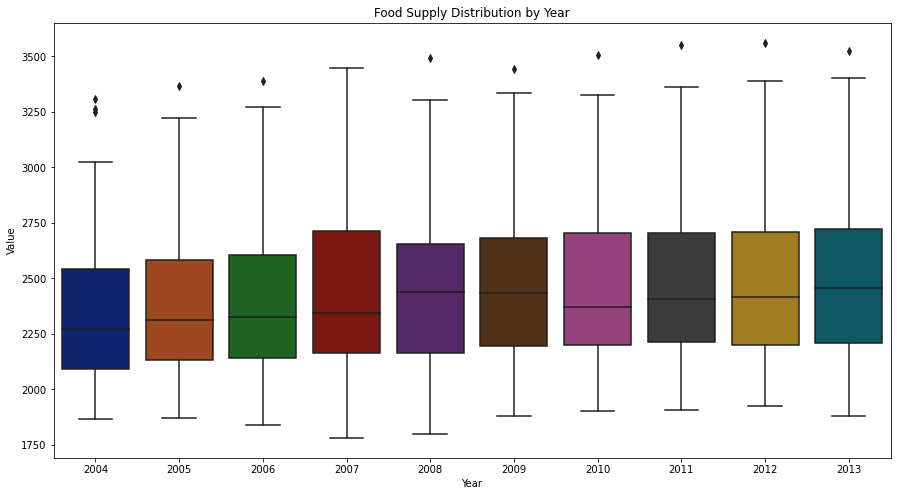

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Year', y='Value', data=supp_data, palette='dark')

# Adding a title
plt.title('Food Supply Distribution by Year')

# Show the plot
plt.show()

From the boxplot on the previous slide, you can see that there was one outlier in 2012.

**Can you tell what country that was?**

In [17]:
# Filter the data for the year 2012
supp_data_2012 = supp_data[supp_data['Year'] == 2012]
# Calculate the IQR
Q1 = supp_data_2012['Value'].quantile(0.25)
Q3 = supp_data_2012['Value'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = supp_data_2012[(supp_data_2012['Value'] < lower_bound) | (supp_data_2012['Value'] > upper_bound)]
# Display the names of the countries that are outliers
print(f"Outliers: {outliers['Country']}")

Outliers: 128    Egypt
Name: Country, dtype: object


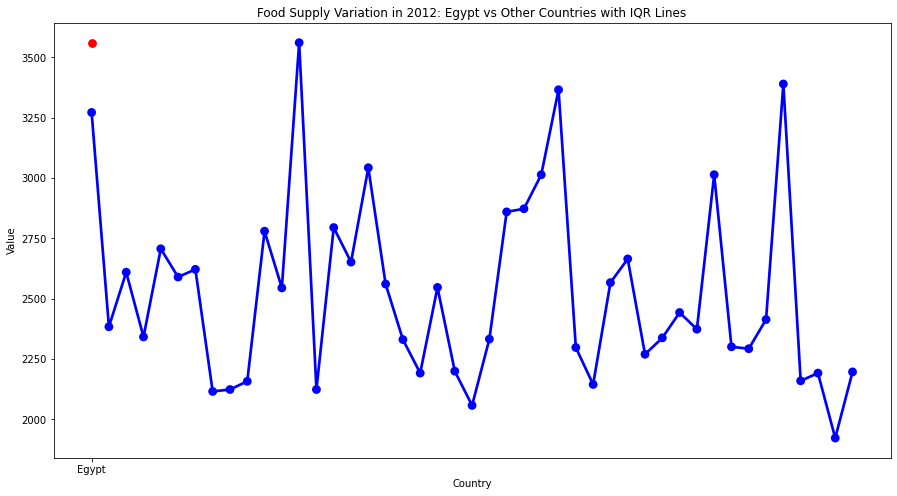

In [18]:
# Calculate the IQR for each country
iqr_data = supp_data_2012.groupby('Country')['Value'].quantile([0.25, 0.75]).unstack()
# Create a point plot
plt.figure(figsize=(15, 8))
sns.pointplot(x='Country', y='Value', data=supp_data_2012, color='blue')
# Highlight Egypt's supply with a different color
sns.pointplot(x='Country', y='Value', data=supp_data_2012[supp_data_2012['Country'] == 'Egypt'], color='red')
# Plot a line for the interquartile range of each country
for country in supp_data_2012['Country'].unique():
    iqr_values = iqr_data.loc[country].values
    plt.plot([country, country], iqr_values, color='black', linestyle='--', linewidth=1)

# Adding a title
plt.title('Food Supply Variation in 2012: Egypt vs Other Countries with IQR Lines')

plt.show()

**Egypt had significantly higher food available for consumption than other African countries.**

## Average and median food production, the Outliers, Quartile and interquartile ranges.

1. **Average Food Production by Country**

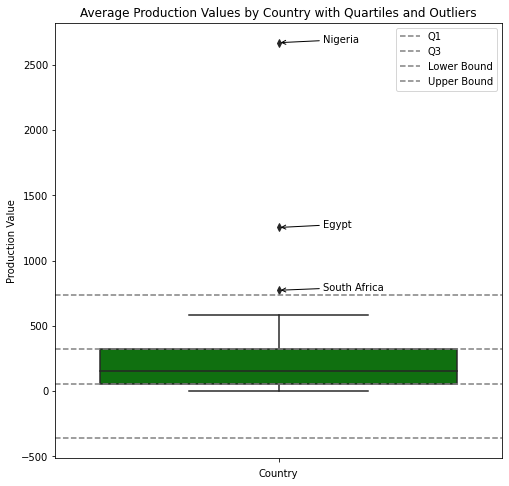

In [19]:
prod_avg = prod_data.groupby('Country')['Value'].mean().reset_index()
# Set the size of the plot
plt.figure(figsize=(8, 8))
# Create a vertical box plot with quartiles and outliers
sns.boxplot(y='Value', data=prod_avg, color='green')
# Calculate quartiles and interquartile range
Q1 = prod_avg['Value'].quantile(0.25)
Q3 = prod_avg['Value'].quantile(0.75)
IQR = Q3 - Q1
# Add quartile and interquartile range annotations
for value, label in zip([Q1, Q3, Q1 - 1.5 * IQR, Q3 + 1.5 * IQR],
                        ['Q1', 'Q3', 'Lower Bound', 'Upper Bound']):
    plt.axhline(value, color='gray', linestyle='--', label=label)
# Highlight outliers
outliers = prod_avg[(prod_avg['Value'] > Q3 + 1.5 * IQR) | (prod_avg['Value'] < Q1 - 1.5 * IQR)]
for country, value in outliers[['Country', 'Value']].values:
    plt.annotate(country, xy=(0, value), xytext=(0.1, value), arrowprops={'arrowstyle': '->', 'lw': 1.0})
# Add labels and title
plt.title('Average Production Values by Country with Quartiles and Outliers')
plt.ylabel('Production Value')
plt.xlabel('Country')
plt.legend()

plt.show()

2. **Median Food Production by Country**

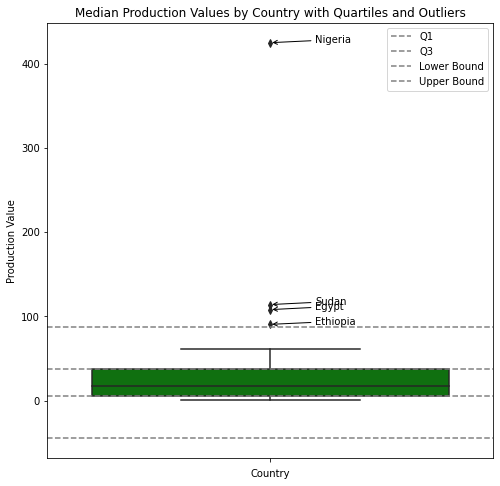

In [20]:
prod_median = prod_data.groupby('Country')['Value'].median().reset_index()
# Set the size of the plot
plt.figure(figsize=(8, 8))
# Create a vertical box plot with quartiles and outliers
sns.boxplot(y='Value', data=prod_median, color='green')
# Calculate quartiles and interquartile range
Q1 = prod_median['Value'].quantile(0.25)
Q3 = prod_median['Value'].quantile(0.75)
IQR = Q3 - Q1
# Add quartile and interquartile range annotations
for value, label in zip([Q1, Q3, Q1 - 1.5 * IQR, Q3 + 1.5 * IQR],
                        ['Q1', 'Q3', 'Lower Bound', 'Upper Bound']):
    plt.axhline(value, color='gray', linestyle='--', label=label)

# Highlight outliers
outliers = prod_median[(prod_median['Value'] > Q3 + 1.5 * IQR) | (prod_median['Value'] < Q1 - 1.5 * IQR)]
for country, value in outliers[['Country', 'Value']].values:
    plt.annotate(country, xy=(0, value), xytext=(0.1, value), arrowprops={'arrowstyle': '->', 'lw': 1.0})

# Add labels and title
plt.title('Median Production Values by Country with Quartiles and Outliers')
plt.ylabel('Production Value')
plt.xlabel('Country')
plt.legend()

plt.show()

## A comparison between average food consumption and production for each year.

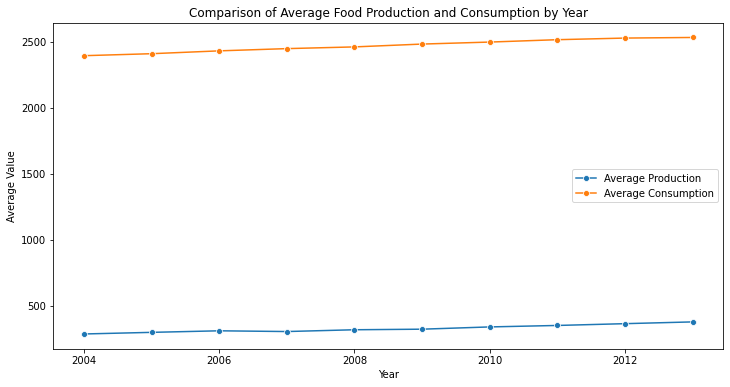

In [21]:
# Average production and consumption for each year
prod_avg2 = prod_data.groupby('Year')['Value'].mean().reset_index()
supp_avg = supp_data.groupby('Year')['Value'].mean().reset_index()
# Set the size of the plot
plt.figure(figsize=(12, 6))
# Plot average production
sns.lineplot(x='Year', y='Value', data=prod_avg2, label='Average Production', marker='o')
# Plot average consumption
sns.lineplot(x='Year', y='Value', data=supp_avg, label='Average Consumption', marker='o')
# Add labels and title
plt.title('Comparison of Average Food Production and Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()

plt.show()

#### Observations

**Production and Consumption Growth:** Overall, both food production and consumption witnessed growth from 2004 to 2013, signaling expansion in the agricultural and food sectors.

**Consistent Discrepancy:** Throughout this period, average production consistently exceeded consumption, implying a tendency for these countries to produce more than they consume, potentially leading to surplus or export opportunities.

**Steady Production Increase:** Average production values demonstrated a consistent upward trend, reflecting improved food production capabilities attributed to advancements in agriculture, technology, and other contributing factors

## Question 1
Which country produced the highest amount of oats in 2010?

In [22]:
# Filter the data for oats and the year 2010
oats_2010 = prod_data[(prod_data['Item'] == 'Oats') & (prod_data['Year'] == 2010)]
# Find the country with the highest production, or print a message if there's no data
oats_highest = oats_2010.nlargest(1, 'Value', 'all')
print(f"Country with the highest oats production in 2010: {oats_highest['Country']}")

Country with the highest oats production in 2010: 46    Algeria
Name: Country, dtype: object
